In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mubeenshehzadi/global-disaster-2018-2024")

print("Path to dataset files:", path)

100%|██████████| 1.66M/1.66M [00:00<00:00, 86.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mubeenshehzadi/global-disaster-2018-2024/versions/1


In [2]:
import pandas as pd
df = pd.read_csv('/root/.cache/kagglehub/datasets/mubeenshehzadi/global-disaster-2018-2024/versions/1/global_disaster_response_2018_2024.csv')

In [21]:
import matplotlib.pyplot as plt
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       50000 non-null  datetime64[ns]
 1   country                    50000 non-null  object        
 2   disaster_type              50000 non-null  object        
 3   severity_index             50000 non-null  float64       
 4   casualties                 50000 non-null  int64         
 5   economic_loss_usd          50000 non-null  float64       
 6   response_time_hours        50000 non-null  float64       
 7   aid_amount_usd             50000 non-null  float64       
 8   response_efficiency_score  50000 non-null  float64       
 9   recovery_days              50000 non-null  int64         
 10  latitude                   50000 non-null  float64       
 11  longitude                  50000 non-null  float64       
 12  year

In [10]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

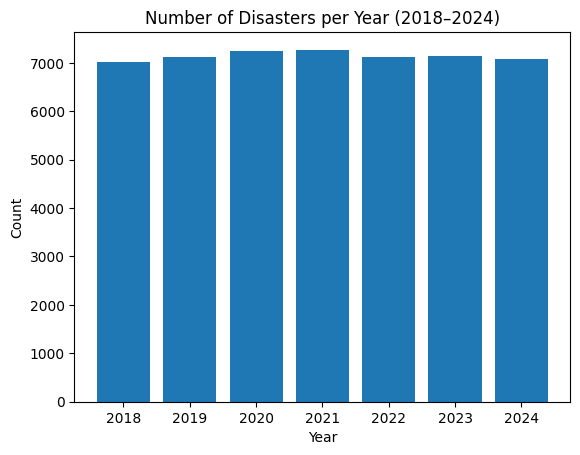

In [18]:
disaster_counts = df['year'].value_counts().sort_index()
plt.bar(disaster_counts.index, disaster_counts.values)
plt.title('Number of Disasters per Year (2018–2024)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(disaster_counts.index)
plt.show()

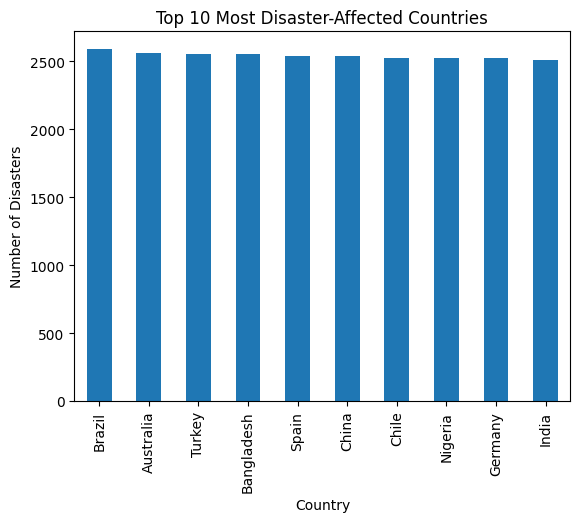

In [19]:
df['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Disaster-Affected Countries')
plt.xlabel('Country')
plt.ylabel('Number of Disasters')
plt.show()

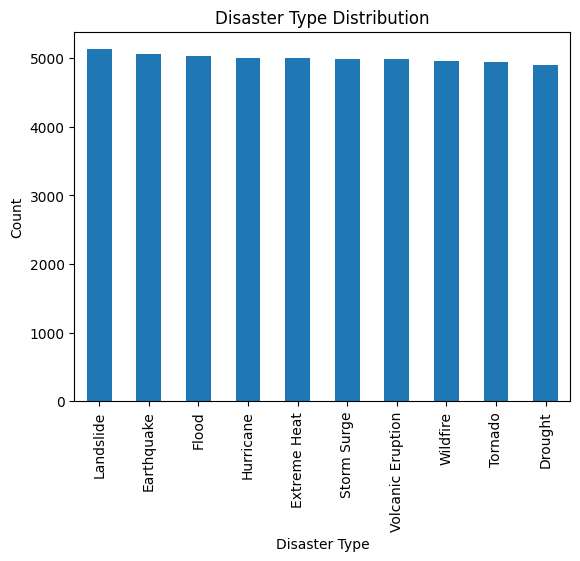

In [20]:
df['disaster_type'].value_counts().plot(kind='bar')
plt.title('Disaster Type Distribution')
plt.xlabel('Disaster Type')
plt.ylabel('Count')
plt.show()

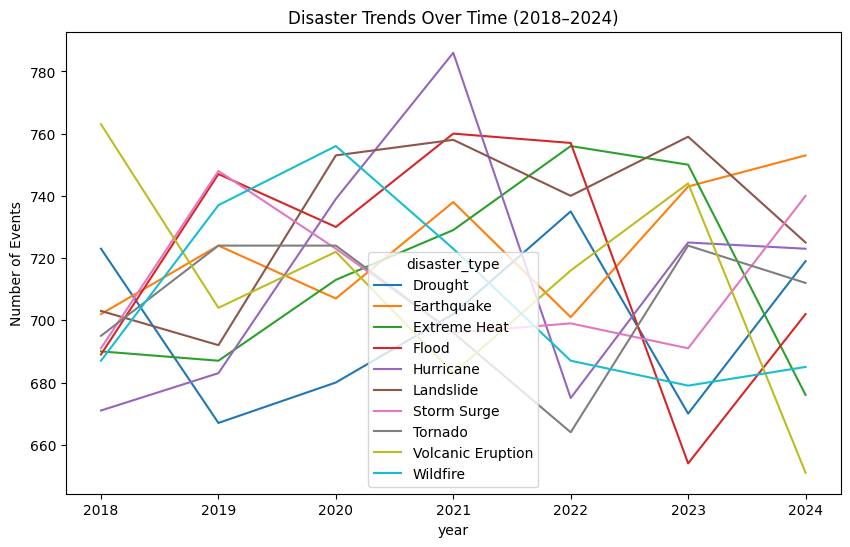

In [22]:
trend = df.groupby(['year', 'disaster_type']).size().unstack(fill_value=0)
trend.plot(kind='line', figsize=(10,6))
plt.title('Disaster Trends Over Time (2018–2024)')
plt.ylabel('Number of Events')
plt.show()
# it shows that earthquake rate is increasing overtime

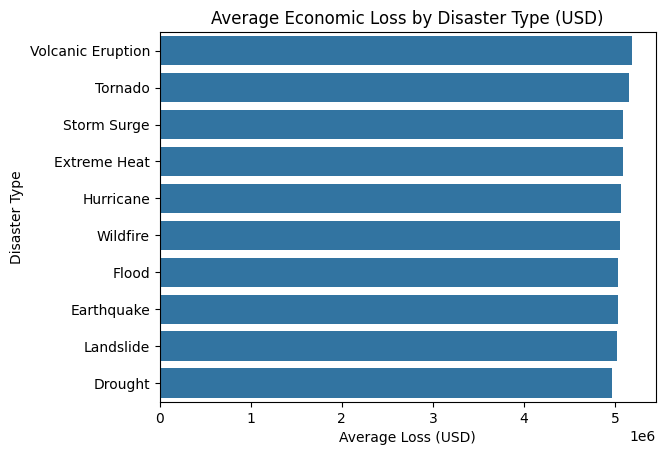

In [25]:
loss_by_type = df.groupby('disaster_type')['economic_loss_usd'].mean().sort_values(ascending=False)
sns.barplot(x=loss_by_type.values, y=loss_by_type.index)
plt.title('Average Economic Loss by Disaster Type (USD)')
plt.xlabel('Average Loss (USD)')
plt.ylabel('Disaster Type')
plt.show()

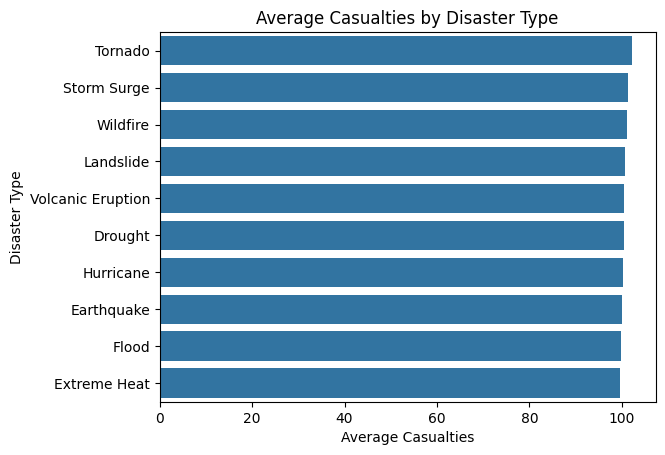

In [26]:
casualties_by_type = df.groupby('disaster_type')['casualties'].mean().sort_values(ascending=False)
sns.barplot(x=casualties_by_type.values, y=casualties_by_type.index)
plt.title('Average Casualties by Disaster Type')
plt.xlabel('Average Casualties')
plt.ylabel('Disaster Type')
plt.show()

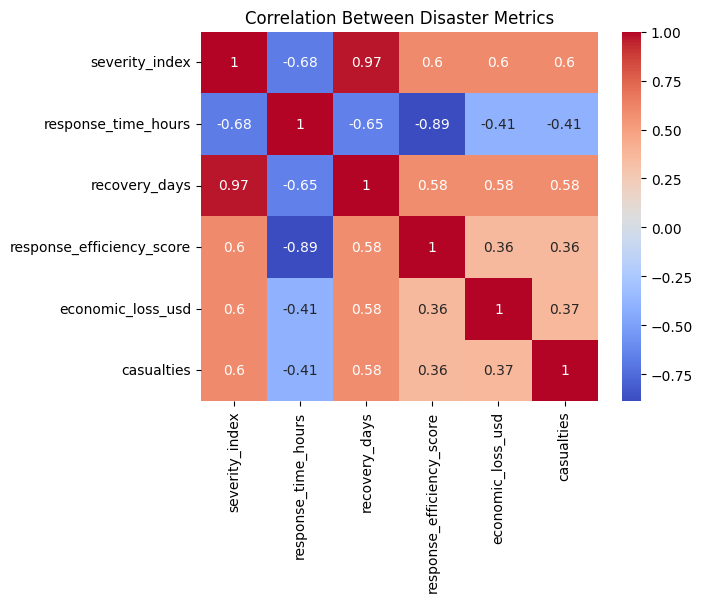

In [27]:
cols = ['severity_index', 'response_time_hours', 'recovery_days',
        'response_efficiency_score', 'economic_loss_usd', 'casualties']
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Disaster Metrics')
plt.show()